# 연속확률분포

## 정규분포

In [1]:
# 패키지 임포트
import os
import warnings
# FutureWarning 제거
warnings.simplefilter(action = 'ignore', category = FutureWarning)

import pandas as pd # pandas package
import numpy as np # numpy package
from scipy import stats # Scipy Package

#시각화 패키지
import matplotlib.pyplot as plt # matplotlib 시각화 패키지
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' : # Windows OS
    font_family = "Malgun Gothic"
else: # MAC OS
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

In [2]:
## 기대값이 70이고 표준편차가 10인 정규분포 생성
norm = stats.norm(loc = 70, scale = 10)

## 구간 내에 숫자를 균일한 간격으로 생성(X축)
# -10~150까지 2000개 생성
s_x = np.linspace(-10, 150, 2000)

## 확률밀도함수
s_pdf = norm.pdf(s_x)

In [3]:
## 확률 밀도함수 계산
# mu = 70
# sigma = 10
# s_pdf_cal = )1 / np.sqrt(2 * np.pi * sigma **2))) * np.exp(-(s_x - mu)**2 / (2*sigma**2))

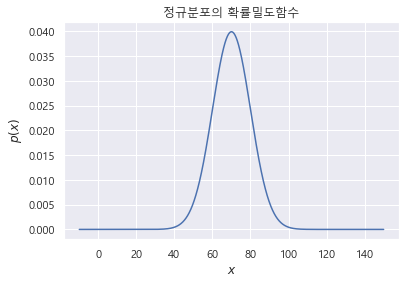

In [4]:
# 정규분포 시각화
plt.plot(s_x, s_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [5]:
## 누적분포함수
s_cdf = norm.cdf(s_x)

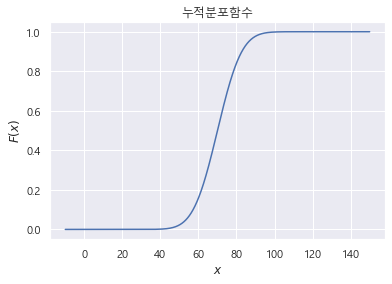

In [6]:
## 누적분포함수 계산
# from scipy.special import erf
# s_cdf_cal = 0.5 * (1 + erf((s_x - mu)/(np.sqrt(2*sigma**2))))

## 누적분포함수 시각화
plt.plot(s_x, s_cdf)
plt.title("누적분포함수")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

In [7]:
## 기대값이 0이고 표준편차가 11인 정규분포
stan_norm = stats.norm(loc = 0, scale = 1)
# 구간 내에 숫자를 균일한 간격으로 생성(X축)
# -10 ~ 150 까지 2000개 생성
sn_x = np.linspace(-5, 5, 1000)

# 확률밀도함수
sn_pdf = stan_norm.pdf(sn_x)

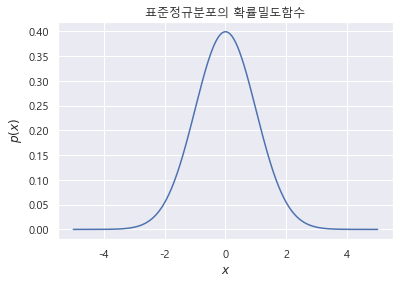

In [8]:
# 정규분포 시각화
plt.plot(sn_x, sn_pdf)
plt.title("표준정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

## 표준화

In [9]:
## 랜덤 데이터 생성
n_data = np.random.randint(1, 100, size = 1000)
n_data = np.sort(n_data)

n_data.shape

(1000,)

In [10]:
## n_data의 평균과 표준편차 계산
n_mean = np.mean(n_data)
print('mean: ', np.mean(n_data))

n_std = np.std(n_data)
print('standard deviation: ', np.std(n_data))

mean:  49.323
standard deviation:  28.392686928151058


In [11]:
## 확률밀도함수
norm_n_data = stats.norm(loc = n_mean, scale = n_std)

n_pdf = norm_n_data.pdf(n_data)

n_data.shape

(1000,)

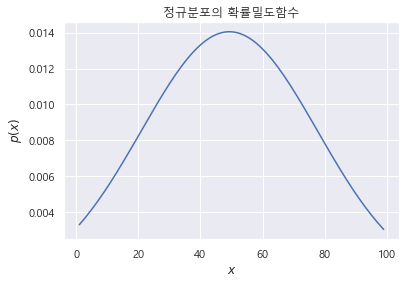

In [12]:
## 정규분포 시각화
plt.plot(n_data, n_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

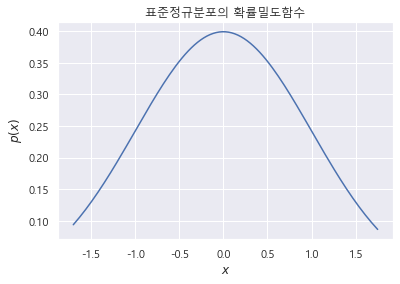

In [13]:
## 표준화 수행
z_data = list(n_data)
z_data_list = []

for i in z_data:
    z = (i - n_mean) / n_std
    z_data_list.append(z)

## 표준정규분포 확률밀도함수
norm_z_data = stats.norm(loc = 0, scale = 1)
z_pdf = norm_z_data.pdf(z_data_list)

# 표준정규분포 시각화
plt.plot(z_data_list, z_pdf)
plt.title("표준정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

## 카이제곱분포

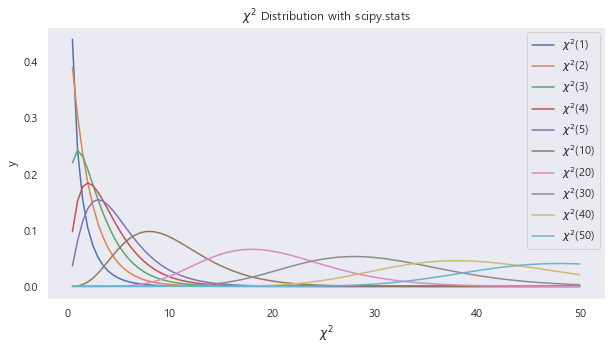

In [15]:
## 카이제곱분포 표현
from scipy.stats import chi2

## 라인스페이스 x축 설정
Chi_X = np.linspace(0.5, 50, 100)

# 자유도에 따른 카이제곱분포 시각화
plt.figure(figsize = (10, 5))
for dof in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50] :
    plt.plot(Chi_X, stats.chi2(dof).pdf(Chi_X),
             label = r'$\chi^2$(' + str(dof) + ')')
    
plt.xlabel(r'$\chi^2$')
plt.ylabel("y")
plt.grid()
plt.title(r'$\chi^2$ Distribution with scipy.stats')
plt.legend()
plt.show()

In [17]:
### 카이제곱분포를 이용한 적합성 검정
## 한 개의 '판매지역' 명목 변수에 값 확인 결과 서울, 인천, 대구 지역에서 판매
## 교차분석표 생성(자유도 2)

# 관찰도수
x_o = [324, 78, 261]
# 기대도수
x_e = [371, 80, 212]

# 지역별 A제품의 판매수
x_crosstab = pd.DataFrame([x_o, x_e],
                         columns = ['서울', '인천', '대구'],
                         index = ['관찰도수', '기대도수'])

x_crosstab

,서울,인천,대구
관찰도수,324,78,261
기대도수,371,80,212


In [18]:
## 카이제곱 통계량 계산
from scipy.stats import chisquare

result = chisquare(x_o, f_exp = x_e)
result

# p-value가 0.0001725로 유의수준 0.05보다 작으므로
# 귀무가설을 기각하고,
# 대립가설을 지지한다.
# 즉, 관찰빈도와 기대빈도는 다르다.

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

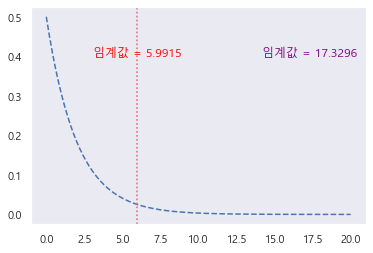

In [21]:
## 위 사례의 카이제곱분포 시각화
from scipy.stats import chi2

dof = 2 # 자유도
x_chi_l = np.linspace(0, 20, 201)
pdf_chi = chi2(dof).pdf(x_chi_l)

# 유의수준 : 5%
x95_c = chi2(dof).ppf(.95)
plt.plot(x_chi_l, pdf_chi, 'b--')

# 95%의 임계값 표시
plt.axvline(x = x95_c, color = 'lightcoral', linestyle = ":")
plt.text(x95_c, .4, '임계값 = ' +  str(round(x95_c, 4)),
        horizontalalignment = 'center', color = 'red')

# 위에서 구한 카이분포 통계값 = result[0]
plt.axvline(x = x95_c, color = 'lightcoral', linestyle = ":")
plt.text(result[0], .4, '임계값 = ' +  str(round(result[0], 4)),
        horizontalalignment = 'center', color = 'purple')

plt.grid()
plt.show()